In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import os


In [3]:
os.chdir ('C:/Noble/Training/KODO/2025/Dec 2025\\Dec 2025 Day 6\\')

In [4]:
pwd

'C:\\Noble\\Training\\KODO\\2025\\Dec 2025\\Dec 2025 Day 6'

In [5]:
data = pd.read_csv('Hitters.csv')
df_hitters = data.copy()
display (df_hitters)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [6]:
print (df_hitters.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [7]:

print('The league types are:', df_hitters['League'].unique())
print('The divison types are:', df_hitters['Division'].unique())
print('The new league options are:', df_hitters['NewLeague'].unique())


The league types are: ['A' 'N']
The divison types are: ['E' 'W']
The new league options are: ['A' 'N']


In [8]:
pd.get_dummies(df_hitters, columns = ['League'])

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,Division,PutOuts,Assists,Errors,Salary,NewLeague,League_A,League_N
0,293,66,1,30,29,14,1,293,66,1,...,29,14,E,446,33,20,NaN,A,True,False
1,315,81,7,24,38,39,14,3449,835,69,...,414,375,W,632,43,10,475.0,N,False,True
2,479,130,18,66,72,76,3,1624,457,63,...,266,263,W,880,82,14,480.0,A,True,False
3,496,141,20,65,78,37,11,5628,1575,225,...,838,354,E,200,11,3,500.0,N,False,True
4,321,87,10,39,42,30,2,396,101,12,...,46,33,E,805,40,4,91.5,N,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,...,311,138,E,325,9,3,700.0,N,False,True
318,492,136,5,76,50,94,12,5511,1511,39,...,451,875,E,313,381,20,875.0,A,True,False
319,475,126,3,61,43,52,6,1700,433,7,...,93,146,W,37,113,7,385.0,A,True,False
320,573,144,9,85,60,78,8,3198,857,97,...,420,332,E,1314,131,12,960.0,A,True,False


In [9]:
pd.get_dummies(df_hitters, columns = ['League'], dtype = int)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,Division,PutOuts,Assists,Errors,Salary,NewLeague,League_A,League_N
0,293,66,1,30,29,14,1,293,66,1,...,29,14,E,446,33,20,NaN,A,1,0
1,315,81,7,24,38,39,14,3449,835,69,...,414,375,W,632,43,10,475.0,N,0,1
2,479,130,18,66,72,76,3,1624,457,63,...,266,263,W,880,82,14,480.0,A,1,0
3,496,141,20,65,78,37,11,5628,1575,225,...,838,354,E,200,11,3,500.0,N,0,1
4,321,87,10,39,42,30,2,396,101,12,...,46,33,E,805,40,4,91.5,N,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,...,311,138,E,325,9,3,700.0,N,0,1
318,492,136,5,76,50,94,12,5511,1511,39,...,451,875,E,313,381,20,875.0,A,1,0
319,475,126,3,61,43,52,6,1700,433,7,...,93,146,W,37,113,7,385.0,A,1,0
320,573,144,9,85,60,78,8,3198,857,97,...,420,332,E,1314,131,12,960.0,A,1,0


In [11]:
pd.get_dummies(df_hitters, columns = ['League'], dtype = int,drop_first=True)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,Division,PutOuts,Assists,Errors,Salary,NewLeague,League_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,E,446,33,20,NaN,A,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,W,632,43,10,475.0,N,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,W,880,82,14,480.0,A,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,E,200,11,3,500.0,N,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,E,805,40,4,91.5,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,E,325,9,3,700.0,N,1
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,E,313,381,20,875.0,A,0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,W,37,113,7,385.0,A,0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,E,1314,131,12,960.0,A,0


In [12]:

df_hitters_num = pd.get_dummies(df_hitters, columns = ['League', 'Division', 'NewLeague'], dtype = int ,drop_first=True)
display (df_hitters_num)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,0,0,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.0,1,0,1
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.0,0,0,0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.0,0,1,0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0,0,0,0


In [13]:

display(df_hitters.isna ().sum())


AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [14]:

print (df_hitters_num.shape)



(322, 20)


In [15]:

df_hitters_num_nonull = df_hitters_num.dropna()
print (df_hitters_num_nonull.isnull().sum())


AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
PutOuts        0
Assists        0
Errors         0
Salary         0
League_N       0
Division_W     0
NewLeague_N    0
dtype: int64


In [16]:
df_hitters_num_nonull.shape

(263, 20)

In [17]:
263+59


322

In [18]:
X = df_hitters_num_nonull.drop('Salary', axis = 1)
display (X)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,1,0,1
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,0,0,0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,0,1,0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,0,0,0


In [19]:

y = df_hitters_num_nonull['Salary']
print (y)


1       475.0
2       480.0
3       500.0
4        91.5
5       750.0
        ...  
317     700.0
318     875.0
319     385.0
320     960.0
321    1000.0
Name: Salary, Length: 263, dtype: float64


In [20]:

scaler = StandardScaler()
X = scaler.fit_transform(X)
display (pd.DataFrame(X ))


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.602900,-0.595675,-0.528551,-1.206112,-0.522063,-0.097527,1.397893,0.346791,0.174373,-0.002920,-0.121671,0.258966,0.435334,1.221499,-0.523191,0.213352,1.058758,0.981166,1.075052
1,0.512542,0.492260,0.729966,0.441515,0.794060,1.609373,-0.901200,-0.452865,-0.409892,-0.076054,-0.415105,-0.199590,0.010373,2.109109,-0.253863,0.819964,-0.944503,0.981166,-0.930187
2,0.628167,0.736490,0.958788,0.402286,1.026317,-0.189792,0.770868,1.301558,1.318174,1.898565,1.412051,1.572666,0.355654,-0.324661,-0.744179,-0.848219,1.058758,-1.019196,1.075052
3,-0.562092,-0.462459,-0.185319,-0.617673,-0.367225,-0.512719,-1.110209,-0.990935,-0.960153,-0.697693,-0.947521,-0.881228,-0.862315,1.840678,-0.543909,-0.696566,1.058758,-1.019196,1.075052
4,1.294712,1.358167,-0.871783,0.755349,-0.018840,-0.282057,0.770868,0.766993,0.634985,-0.612370,0.422846,0.017294,-0.251434,-0.031177,2.087225,2.488147,-0.944503,0.981166,-0.930187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0.634968,0.425651,-0.528551,0.402286,-0.134968,-0.189792,-0.483183,0.019917,0.129549,-0.453913,0.053785,-0.060165,-0.463914,0.122723,-0.757991,-0.848219,1.058758,-1.019196,1.075052
259,0.600961,0.625476,-0.757373,0.833807,-0.057549,2.439756,0.979876,1.250292,1.219250,-0.368590,1.620783,0.373605,2.332483,0.079774,1.810990,1.729882,-0.944503,-1.019196,-0.930187
260,0.485336,0.403449,-0.986194,0.245369,-0.328515,0.502194,-0.274175,-0.419565,-0.446988,-0.758638,-0.436281,-0.735605,-0.433560,-0.908051,-0.039781,-0.241607,-0.944503,0.981166,-0.930187
261,1.151881,0.803098,-0.299730,1.186870,0.329546,1.701637,0.143842,0.236810,0.208378,0.338372,0.329068,0.277556,0.272180,3.662427,0.084525,0.516658,-0.944503,-1.019196,-0.930187


In [22]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=365)
print (X.shape)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print ( y_test.shape)


(263, 19)
(223, 19)
(40, 19)
(223,)
(40,)


In [23]:

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print (lin_reg)


LinearRegression()


In [24]:

print("Linear Regression coefficients are: ",lin_reg.coef_)
print("Linear Regression y-intercept is: ",lin_reg.intercept_)


Linear Regression coefficients are:  [-257.35844535  288.93556711   47.467916    -56.41938899  -42.95345464
  130.04444251   -5.68452199 -462.74866927    4.14121686  -62.13415522
  623.74925227  370.80754975 -272.52165001   96.51529334   58.36180777
  -16.18769837   49.93173115  -69.01315939  -25.55603453]
Linear Regression y-intercept is:  533.4911135461433


In [25]:

lin_reg_y_pred = lin_reg.predict(X_test)
print (lin_reg_y_pred)


[ 388.9388849   443.6456298   773.82433308  710.08139862  402.74616516
  271.0566144   149.70818843  437.47933078 1068.82854974  572.57962733
  569.92845346  479.9216838   921.01481087  701.52296781  191.25230267
  315.99823717  285.78634853  663.39467138  181.01989896  713.21469079
  885.01764391  201.60662116  563.22987529 1174.96748756 1148.25333363
 1429.16586106  781.59114494 1113.11791163  537.33857097 1095.46869039
  474.07904449  372.37431556  369.42235033  513.31989049  186.49710294
  234.19927603  201.55407654 1193.87415062  673.72215478  226.91357262]


In [26]:

lin_comp = pd.DataFrame({'Actual': y_test,'Predicted': lin_reg_y_pred })
lin_comp['Difference'] = lin_comp ['Actual'] - lin_comp ['Predicted']
display(lin_comp)


,Actual,Predicted,Difference
14,240.000,388.938885,-148.938885
181,737.500,443.645630,293.854370
177,1300.000,773.824333,526.175667
124,737.500,710.081399,27.418601
277,475.000,402.746165,72.253835
58,416.667,271.056614,145.610386
188,75.000,149.708188,-74.708188
20,100.000,437.479331,-337.479331
120,733.333,1068.828550,-335.495550
33,612.500,572.579627,39.920373


In [27]:

print("Linear Accuracy of the Training Data: ",r2_score(y_train,lin_reg.predict(X_train)))
print("Linear Accuracy of the Test Data: ",r2_score(y_test, lin_reg_y_pred))


Linear Accuracy of the Training Data:  0.5486561067255397
Linear Accuracy of the Test Data:  0.4555365489957932


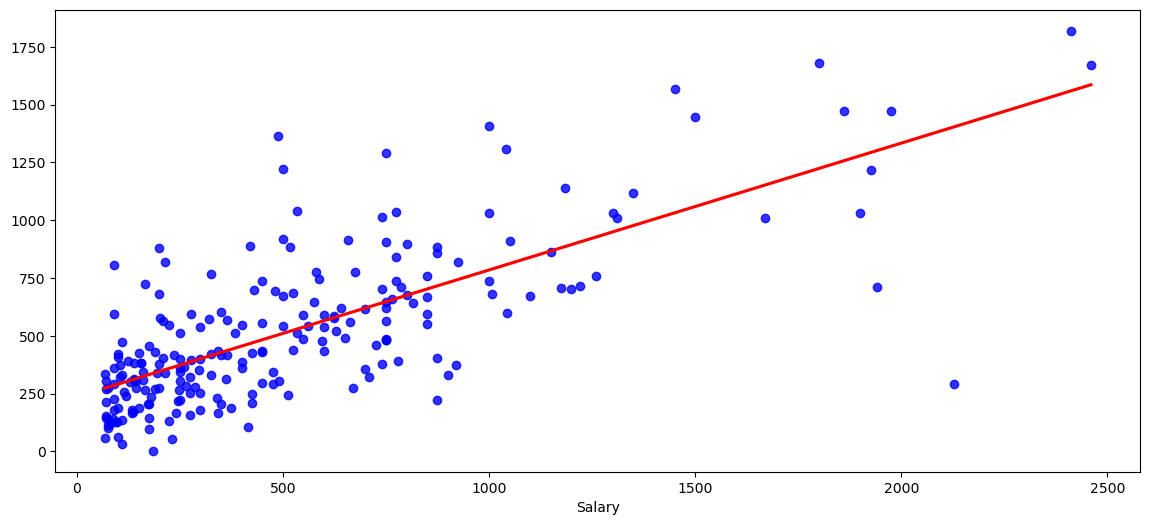

In [43]:
plt.figure(figsize=(14,6))
sns.regplot( y= lin_reg.predict(X_train), x = y_train, scatter_kws={"color": "b"}, 
            line_kws={"color": "r"},ci = None)
plt.show()


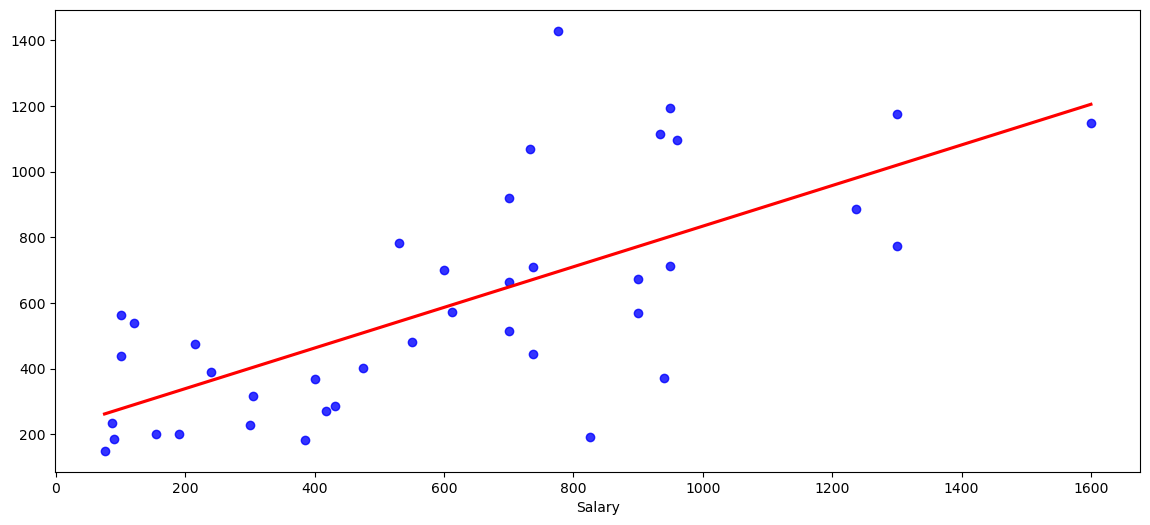

In [44]:

plt.figure(figsize=(14,6))
sns.regplot( y = lin_reg_y_pred, x = y_test, scatter_kws={"color": "b"}, 
            line_kws={"color": "r"},ci = None)
plt.show()


In [31]:
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
print (cv)


RepeatedKFold(n_repeats=3, n_splits=5, random_state=1)


In [39]:
ridge = RidgeCV(alphas=np.arange(0.1, 5, 0.1), cv=cv, scoring='neg_mean_absolute_error')
print (ridge)


RidgeCV(alphas=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
        cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=1),
        scoring='neg_mean_absolute_error')


In [40]:
ridge.fit(X_train,y_train)
ridge_reg_y_pred = ridge.predict(X_test)
print (ridge_reg_y_pred)


[ 402.23184073  449.59581992  760.66470246  675.68608705  393.07801365
  325.18522542  131.64037921  477.60104757  990.33115132  548.66644744
  569.35621033  478.28548607  894.87582666  645.34403916  495.61137559
  332.50316552  324.67765289  670.86652943  237.63369273  721.56597641
  869.95001471  192.61831103  639.41243238 1186.06500284  989.12909133
 1513.03472457  763.03121565 1157.95106048  536.24856734 1145.68937636
  487.94449871  484.67181027  513.65529008  507.28968389  140.11226114
  177.41736971  160.71441643 1165.62251382  757.00058978  297.59255549]


In [41]:

print("Ridge tuning parameter:", (ridge.alpha_))
print ("Ridge model coefficients:", (ridge.coef_))
print ("Ridge model intercept:", (ridge.intercept_))


Ridge tuning parameter: 4.9
Ridge model coefficients: [-154.23131579  151.61918367    0.67361802   17.51956131    1.28528233
   91.16475531  -42.88388206  -64.76288555  113.55499885   59.44434813
  187.37255201  120.99555178 -161.07468175  100.49771884   37.38626393
  -21.64093449   38.0650802   -72.00711018  -19.92852574]
Ridge model intercept: 535.7454694127576


In [38]:

print("Ridge Accuracy of the Training Data: ",r2_score(y_train,ridge.predict(X_train)))
print("Ridge Accuracy of the Test Data: ",r2_score (y_test, ridge_reg_y_pred))



Ridge Accuracy of the Training Data:  0.5075400952336149
Ridge Accuracy of the Test Data:  0.4651642783208285


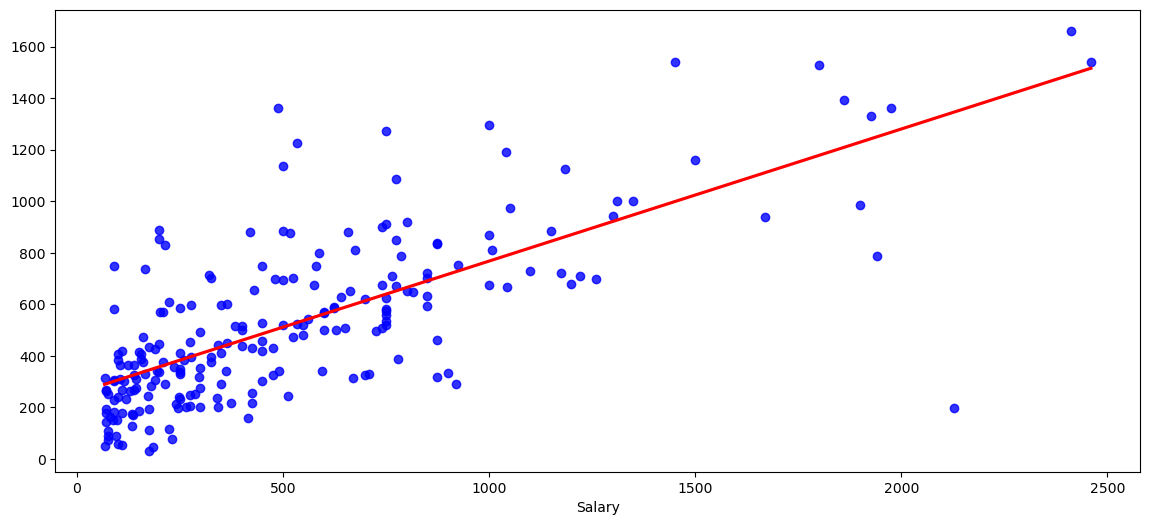

In [42]:

plt.figure(figsize=(14,6))
sns.regplot(x = y_train, y = ridge.predict(X_train),  scatter_kws={"color": "b"}, 
            line_kws={"color": "r"},ci = None)
plt.show()


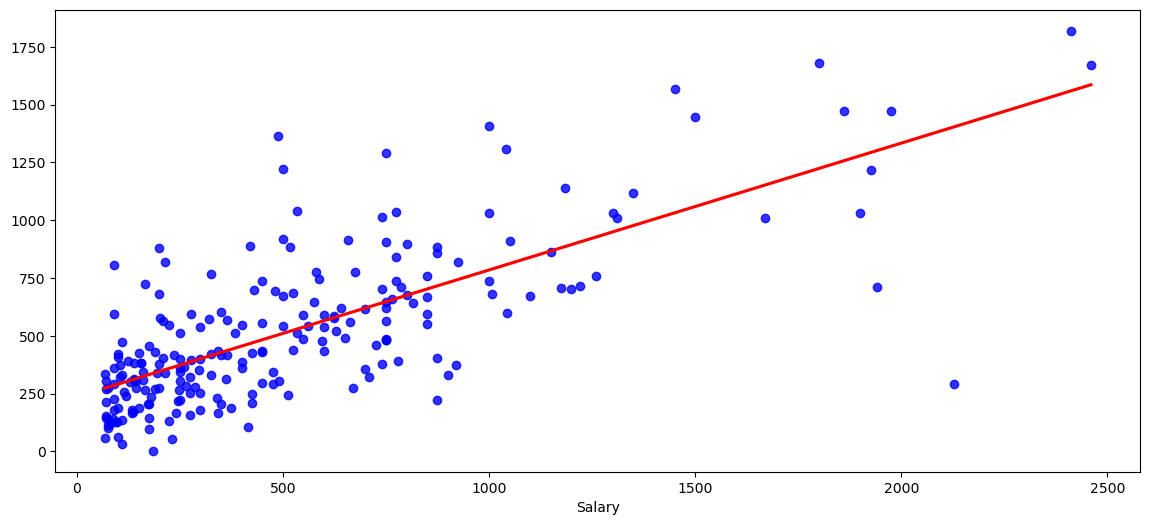

In [45]:
plt.figure(figsize=(14,6))
sns.regplot( y= lin_reg.predict(X_train), x = y_train, scatter_kws={"color": "b"}, 
            line_kws={"color": "r"},ci = None)
plt.show()


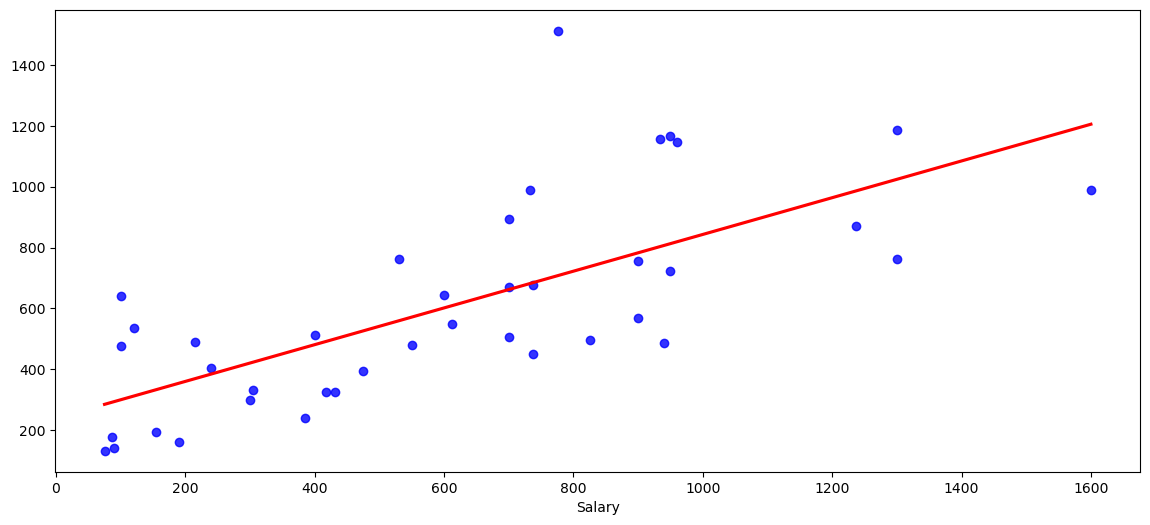

In [46]:

plt.figure(figsize=(14,6))
sns.regplot(  x = y_test, y = ridge_reg_y_pred, scatter_kws={"color": "b"}, 
            line_kws={"color": "r"},ci = None)
plt.show()


In [49]:
y_test


14      240.000
181     737.500
177    1300.000
124     737.500
277     475.000
58      416.667
188      75.000
20      100.000
120     733.333
33      612.500
115     900.000
209     550.000
117     700.000
156     600.000
170     825.000
45      305.000
90      431.500
317     700.000
319     385.000
129     950.000
136    1237.500
116     155.000
272     100.000
310    1300.000
313    1600.000
24      776.667
284     530.000
74      933.333
314     120.000
320     960.000
244     215.000
286     940.000
245     400.000
230     700.000
273      90.000
176      86.500
261     190.000
65      950.000
29      900.000
167     300.000
Name: Salary, dtype: float64

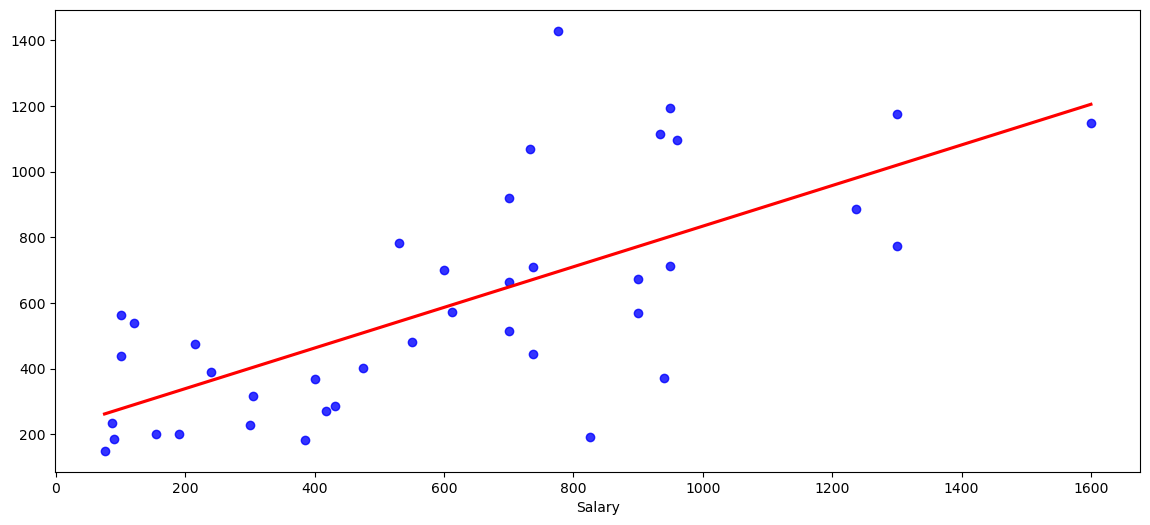

In [47]:

plt.figure(figsize=(14,6))
sns.regplot( y = lin_reg_y_pred, x = y_test, scatter_kws={"color": "b"}, 
            line_kws={"color": "r"},ci = None)
plt.show()


In [51]:
y_test

14      240.000
181     737.500
177    1300.000
124     737.500
277     475.000
58      416.667
188      75.000
20      100.000
120     733.333
33      612.500
115     900.000
209     550.000
117     700.000
156     600.000
170     825.000
45      305.000
90      431.500
317     700.000
319     385.000
129     950.000
136    1237.500
116     155.000
272     100.000
310    1300.000
313    1600.000
24      776.667
284     530.000
74      933.333
314     120.000
320     960.000
244     215.000
286     940.000
245     400.000
230     700.000
273      90.000
176      86.500
261     190.000
65      950.000
29      900.000
167     300.000
Name: Salary, dtype: float64

In [52]:

lasso = LassoCV(alphas=np.arange(0.1, 10.0, 0.1), cv=cv, tol = 1)



In [53]:

lasso.fit(X_train,y_train)
lasso_reg_y_pred = lasso.predict(X_test)


In [54]:

print("Lasso tuning parameter:", (lasso.alpha_))
print ("Lasso model coefficients:", (lasso.coef_))
print ("Lassso model intercept:", (lasso.intercept_))


Lasso tuning parameter: 9.3
Lasso model coefficients: [ 60.27154614  38.48204704  17.34207691   6.75367912   7.59904155
  52.56071145 130.88602135  50.29266464  17.56302951  25.05894394
   0.           0.          -8.04220037  92.67605996  -0.
 -11.08154227  14.00300148 -68.86641076   0.        ]
Lassso model intercept: 540.4481084676969


In [55]:

print("Lasso Accuracy of the Training Data R2_Score: ",r2_score(y_train,lasso.predict(X_train)))
print("Lasso Accuracy of the Test Data R2_ScoreR2_Score: ",r2_score (y_test, lasso_reg_y_pred))


Lasso Accuracy of the Training Data R2_Score:  0.4449170081864118
Lasso Accuracy of the Test Data R2_ScoreR2_Score:  0.35831649593701276


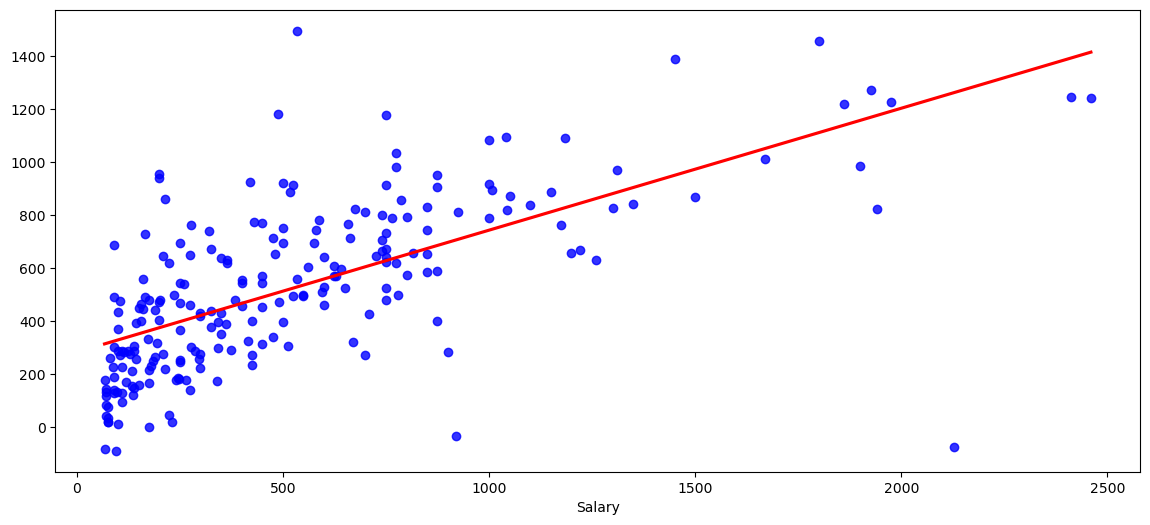

In [56]:
plt.figure(figsize=(14,6))
sns.regplot( x = y_train, y = lasso.predict(X_train), scatter_kws={"color": "b"}, 
            line_kws={"color": "r"},ci = None)
plt.show()


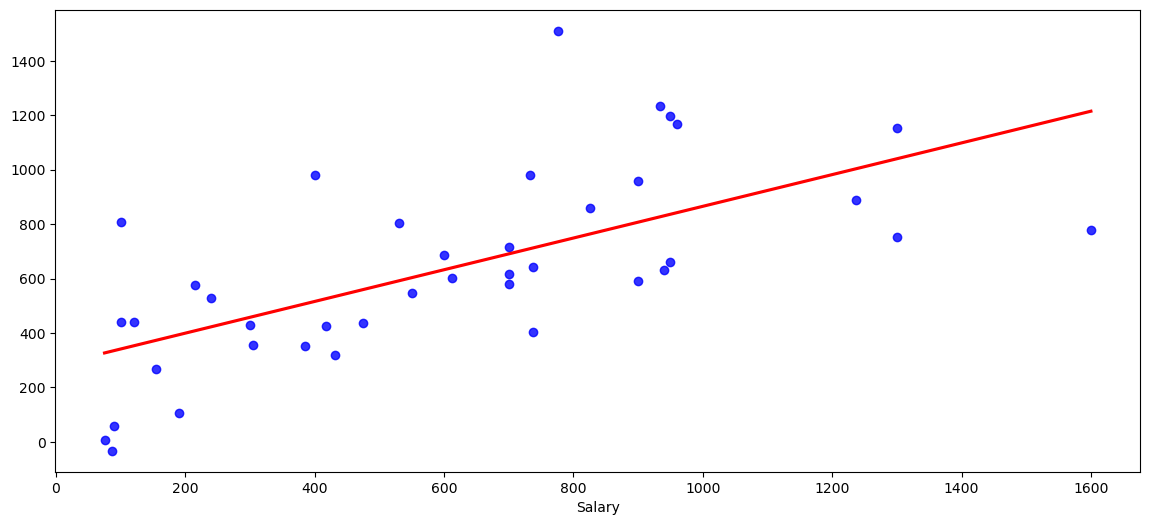

In [57]:

plt.figure(figsize=(14,6))
sns.regplot( x = y_test,y= lasso_reg_y_pred,  scatter_kws={"color": "b"}, 
            line_kws={"color": "r"},ci = None)
plt.show()


In [58]:

print("Linear Accuracy of the Training Data: ",r2_score(y_train,lin_reg.predict(X_train)))
print("Linear Accuracy of the Test Data: ",r2_score(y_test, lin_reg_y_pred))
print ()
print("Ridge Accuracy of the Training Data: ",r2_score(y_train,ridge.predict(X_train)))
print("Ridge Accuracy of the Test Data: ",r2_score (y_test, ridge_reg_y_pred))
print ()
print("Lasso Accuracy of the Training Data R2_Score: ",r2_score(y_train,lasso.predict(X_train)))
print("Lasso Regression Model Test R2_Score: ",r2_score (y_test, lasso_reg_y_pred))






Linear Accuracy of the Training Data:  0.5486561067255397
Linear Accuracy of the Test Data:  0.4555365489957932

Ridge Accuracy of the Training Data:  0.5306000950826958
Ridge Accuracy of the Test Data:  0.47680910471336924

Lasso Accuracy of the Training Data R2_Score:  0.4449170081864118
Lasso Regression Model Test R2_Score:  0.35831649593701276


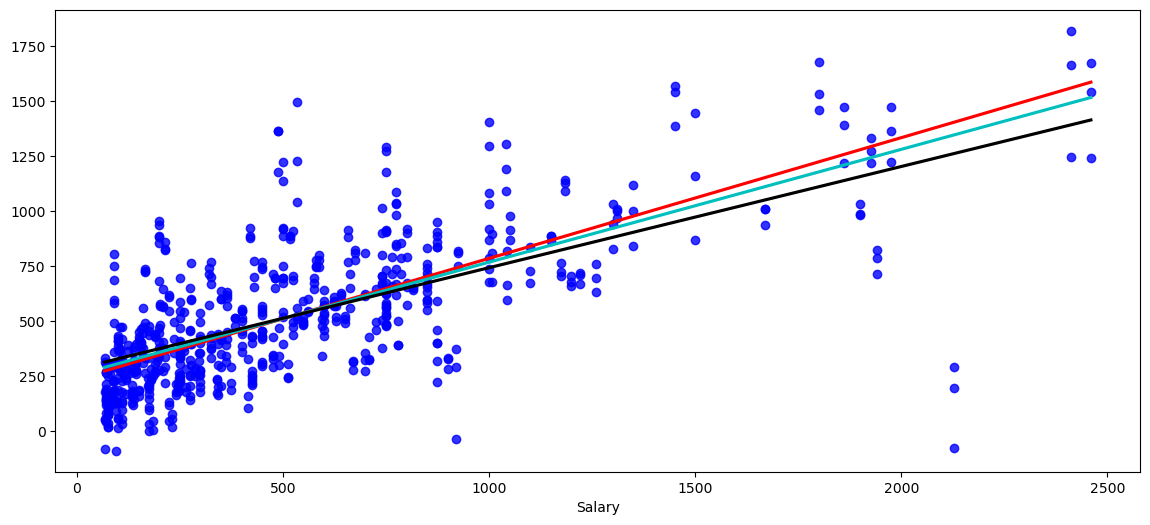

In [59]:

plt.figure(figsize=(14,6))
sns.regplot( x = y_train, y = lin_reg.predict(X_train), scatter_kws={"color": "b"}, 
            line_kws={"color": "r"},ci = None)
sns.regplot( x = y_train, y = ridge.predict(X_train),  scatter_kws={"color": "b"}, 
            line_kws={"color": "c"},ci = None)
sns.regplot( x = y_train, y = lasso.predict(X_train), scatter_kws={"color": "b"}, 
            line_kws={"color": "k"},ci = None)
plt.show()




In [64]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=200)
rf.fit(X_train, y_train)
print (rf)


RandomForestRegressor(n_estimators=200)


In [65]:
rf.predict (X_test)

array([ 407.105855,  396.63335 ,  938.72477 ,  749.152255,  421.458335,
        379.255905,   78.4425  ,  120.68    ,  743.35939 ,  516.899995,
       1052.302555,  374.9125  ,  560.225   ,  402.239895,  824.40236 ,
        261.733345,  317.716665,  710.873315,  415.60417 ,  878.751435,
       1292.31954 ,  164.563335,  518.59452 , 1363.34438 ,  860.417615,
       1551.009515,  771.926185, 1260.57633 ,  139.43333 , 1284.866035,
        185.7225  ,  854.158055,  751.458325,  414.10584 ,   76.475   ,
         77.325   ,  114.771665, 1177.329295, 1120.02729 ,  315.83    ])

In [66]:

print("Linear Accuracy of the Training Data: ",r2_score(y_train,rf.predict(X_train)))
print("Linear Accuracy of the Test Data: ",r2_score(y_test, rf.predict(X_test)))

Linear Accuracy of the Training Data:  0.9442261301682399
Linear Accuracy of the Test Data:  0.5999832076704972


In [67]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
dt.fit(X_train, y_train)
print (dt)

DecisionTreeRegressor()


In [68]:

print("Linear Accuracy of the Training Data: ",r2_score(y_train,dt.predict(X_train)))
print("Linear Accuracy of the Test Data: ",r2_score(y_test, dt.predict(X_test)))

Linear Accuracy of the Training Data:  1.0
Linear Accuracy of the Test Data:  -0.38732652231588416
